# 1. Giới thiệu

## 1.1. Mục tiêu
Phân tích dữ liệu học tập để xác định các yếu tố ảnh hưởng đến điểm thi cuối kỳ (Final_Exam_Score) và khả năng đậu/rớt (Pass_Fail), đồng thời xây dựng mô hình dự đoán.

## 1.2. [About Student Performance Prediction Dataset ](https://www.kaggle.com/datasets/amrmaree/student-performance-prediction/data)

### 1.2.1. Tổng quan
Bộ dữ liệu này chứa thông tin về kết quả học tập của sinh viên, thói quen học tập và các yếu tố bên ngoài ảnh hưởng đến điểm thi cuối kỳ. Bộ dữ liệu được thiết kế để phục vụ cho việc mô hình hóa dự đoán, trực quan hóa dữ liệu và phân tích trong lĩnh vực giáo dục.

### 1.2.2 Mục đích bộ dữ liệu
Bộ dữ liệu này hữu ích cho:
- Dự đoán điểm thi cuối kỳ của sinh viên 
- Xác định các yếu tố chính ảnh hưởng đến kết quả học tập 
- Khám phá tầm quan trọng của các đặc trưng trong các bộ dữ liệu liên quan đến giáo dục 
- Xây dựng các mô hình học máy cho bài toán hồi quy và phân loại 
### 1.2.3. Mô tả cột dữ liệu
| Tên cột | Mô tả |
| ----------- | ----------- |
| Student_ID | Mã định danh duy nhất cho mỗi sinh viên. |
| Gender | Giới tính của sinh viên (Male/Female). |
| Study_Hours_per_Week | Số giờ học trung bình mỗi tuần. |
| Attendance_Rate | Tỷ lệ tham gia lớp học, tức chuyên cần (50% - 100%). |
| Past_Exam_Scores | Điểm trung bình của các kỳ thi trước (50 - 100). |
| Parental_Education_Level | 	Trình độ học vấn của phụ huynh (High School, Bachelors, Masters, PhD) - (Trung học phổ thông, Cử nhân, Thạc sĩ, Tiến sĩ). |
| Internet_Access_at_Home | Sinh viên có truy cập internet tại nhà hay không (Yes/No). |
| Extracurricular_Activities |Sinh viên có tham gia các hoạt động ngoại khóa hay không (Yes/No). |
| Final_Exam_Score (Target) | Điểm thi cuối kỳ của sinh viên (50 - 100, là số nguyên). |
| Pass_Fail (Target) | Kết quả thi (Pass/Fail). |

### 1.2.4. Suy luận bên lề
Quan sát các điểm dữ liệu trong bộ dữ liệu:
- S315,Male,25,78.88159770457736,81,High School,No,No,59,Fail
- S408,Female,35,87.08434721143328,73,Masters,No,Yes,60,Pass

=> Nếu Score < 60 thì Fail, ngược lại thì Pass.

## 1.3. Câu hỏi nghiên cứu
- Những đặc trưng nào có tác động mạnh nhất đến điểm thi cuối kỳ?
- Có thể dự đoán điểm thi cuối kỳ hoặc kết quả Fail/Pass dựa trên các đặc trưng không?

## 1.4. Phương pháp
Thống kê mô tả, trực quan hóa, kiểm định giả thuyết, tương quan, hồi quy, phân loại

# 2. Khám phá dữ liệu

In [6]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [7]:
original_spp = Table.read_table('student_performance_dataset.csv')
original_spp.show(5)

Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
S147,Male,31,68.2678,86,High School,Yes,Yes,63,Pass
S136,Male,16,78.2229,73,PhD,No,No,50,Fail
S209,Female,21,87.5251,74,PhD,Yes,No,55,Fail
S458,Female,27,92.0765,99,Bachelors,No,No,65,Pass
S078,Female,37,98.6555,63,Masters,No,Yes,70,Pass


## 2.1. Kiểm tra cấu trúc dữ liệu

Kích thước bộ dữ liệu, các cột, kiểu dữ liệu

In [8]:
# Số lượng dòng (sinh viên)
print("Số dòng (sinh viên):", original_spp.num_rows)

# Số lượng cột (thuộc tính)
print("Số cột:", original_spp.num_columns)

# Tên các cột
original_spp.labels

Số dòng (sinh viên): 708
Số cột: 10


('Student_ID',
 'Gender',
 'Study_Hours_per_Week',
 'Attendance_Rate',
 'Past_Exam_Scores',
 'Parental_Education_Level',
 'Internet_Access_at_Home',
 'Extracurricular_Activities',
 'Final_Exam_Score',
 'Pass_Fail')

Kiểm tra giá trị thiếu

In [9]:
# Tạo bảng mới kiểm tra giá trị rỗng trong từng cột
def count_missing(column):
    return sum(original_spp.column(column) == '')

Table().with_columns(
    'Cột', original_spp.labels,
    'Số giá trị thiếu', [count_missing(col) for col in original_spp.labels]
).show()


Cột,Số giá trị thiếu
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


### Nhận xét tổng quan
- Dataset Student Performance Prediction có 708 sinh viên. Mỗi sinh viên có 9 đặc trưng (không tính ID)
- Dữ liệu gồm cả biến categorical như Gender, Parental_Education_Level, Internet_Access_at_Home, Extracurricular_Activities, Pass_Fail và biến numerical như Study_Hours_per_Week, Attendance_Rate, Past_Exam_Scores, Final_Exam_Score
- Dữ liệu đầy đủ, không đặc trưng nào bị thiếu

## 2.2. Thống kê mô tả

In [ ]:
# Các cột numerical
spp_numeric_cols = ['Study_Hours_per_Week', 
                    'Attendance_Rate', 
                    'Past_Exam_Scores', 
                    'Final_Exam_Score']

In [42]:
numerical_features = ['Study_Hours_per_Week', 
                      'Attendance_Rate', 
                      'Past_Exam_Scores']

In [37]:
# Các cột categorical
spp_categorical_cols = [
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities',
    'Pass_Fail'
]

In [90]:
categorical_features = [
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities'
]

### 2.2.1. Với đặc trưng numerical

Tính trung bình, trung vị, độ lệch chuẩn, min, max

In [39]:
numerical_data = original_spp.select(spp_numeric_cols)
numerical_data_stats = Table().with_columns(
    'Variable', numerical_data.labels,
    'Mean', [np.mean(numerical_data.column(col)) for col in numerical_data.labels],
    'Median', [np.median(numerical_data.column(col)) for col in numerical_data.labels],
    'Std', [np.std(numerical_data.column(col)) for col in numerical_data.labels],
    'Min', [np.min(numerical_data.column(col)) for col in numerical_data.labels],
    'Max', [np.max(numerical_data.column(col)) for col in numerical_data.labels]
)
numerical_data_stats.show()

Variable,Mean,Median,Std,Min,Max
Study_Hours_per_Week,26.1328,27,8.87145,10,39
Attendance_Rate,78.1077,79.363,13.7931,50.117,99.9677
Past_Exam_Scores,77.8715,79,14.3926,50,100
Final_Exam_Score,58.7712,59.5,6.70114,50,77


Trực quan hóa

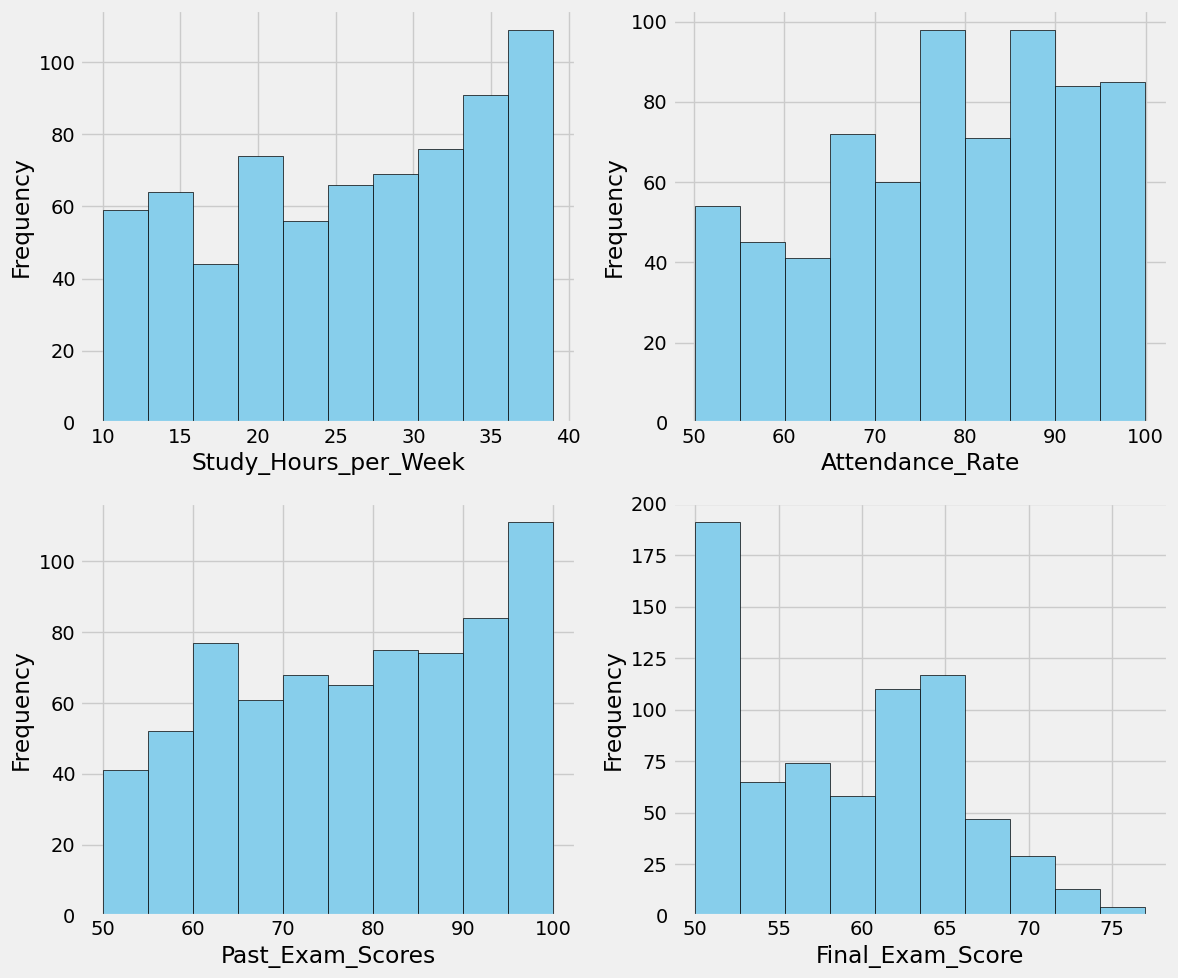

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Tạo lưới 2x2 cho 4 cột
axes = axes.flatten()

for i, col in enumerate(spp_numeric_cols):
    axes[i].hist(numerical_data.column(col), bins=10, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout() 
plt.show()

### 2.2.2. Đặc trưng categorical

Tính tỷ lệ phần trăm 

--- Gender ---


Gender,count,Percentage
Female,375,52.9661
Male,333,47.0339


--- Parental_Education_Level ---


Parental_Education_Level,count,Percentage
Bachelors,189,26.6949
High School,183,25.8475
Masters,171,24.1525
PhD,165,23.3051


--- Internet_Access_at_Home ---


Internet_Access_at_Home,count,Percentage
No,381,53.8136
Yes,327,46.1864


--- Extracurricular_Activities ---


Extracurricular_Activities,count,Percentage
No,361,50.9887
Yes,347,49.0113


--- Pass_Fail ---


Pass_Fail,count,Percentage
Fail,354,50
Pass,354,50


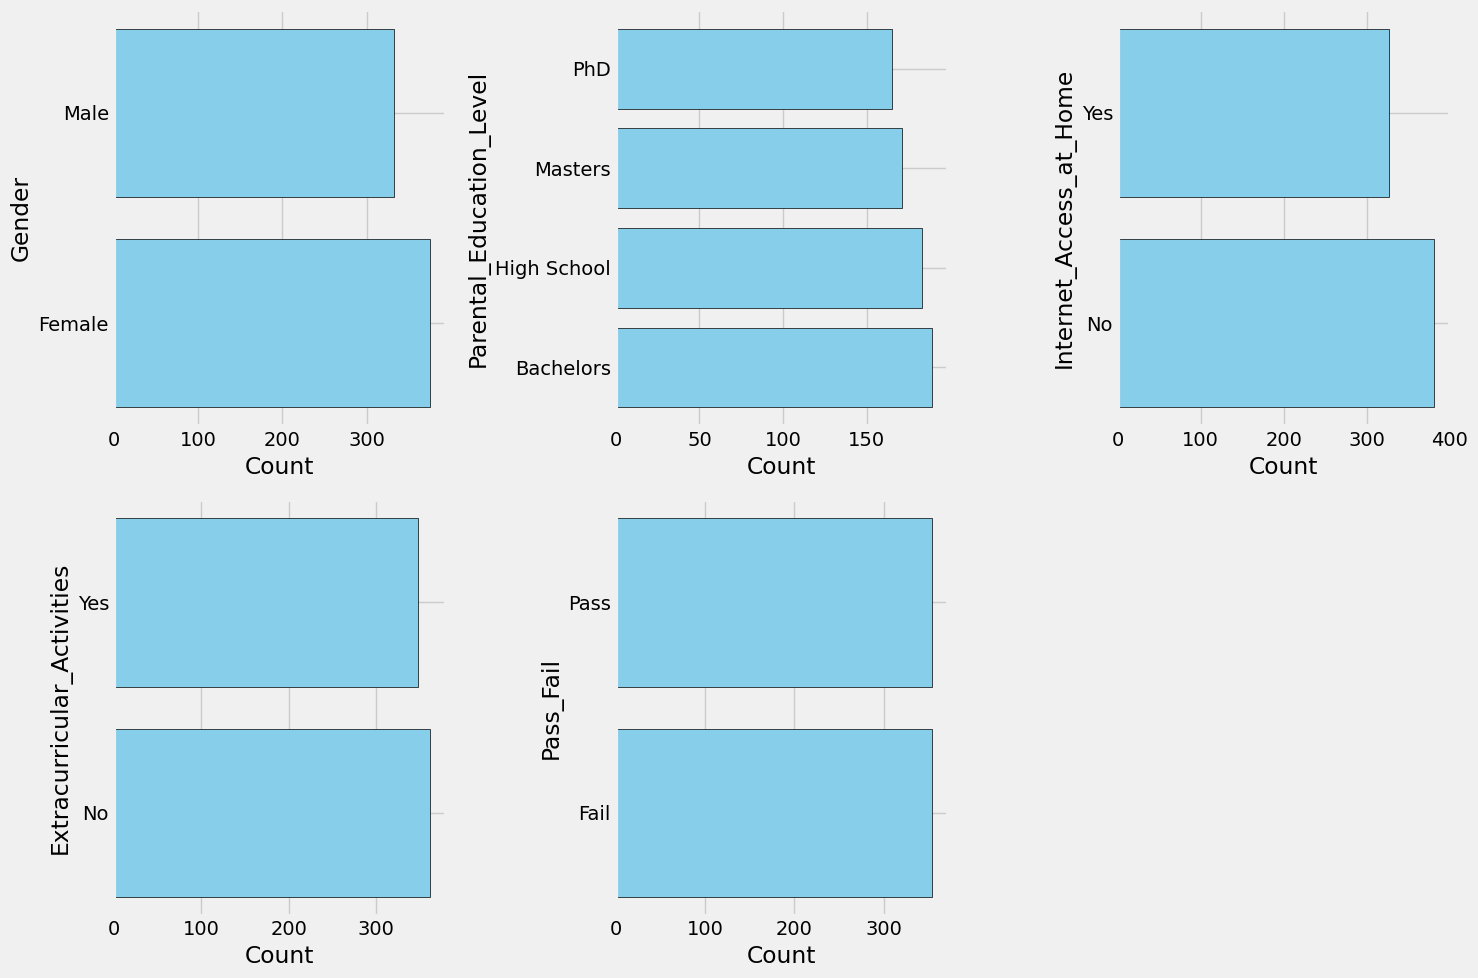

In [60]:
# Hàm phân tích và vẽ biểu đồ cho từng cột
def analyze_categorical_columns(columns):
    rows = (len(columns) + 2) // 3  # Tính số hàng cần thiết cho lưới 2x3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Tạo lưới 2x3
    axes = axes.flatten()  # Chuyển mảng 2D thành 1D để dễ truy cập
    
    for i, col in enumerate(columns):
        counts = original_spp.group(col)  # Đếm số lượng từng nhóm
        total = original_spp.num_rows
        percent = counts.with_column('Percentage', counts.column('count') / total * 100)  # Tính tỷ lệ phần trăm
        
        # Hiển thị bảng tần suất
        print(f'--- {col} ---')
        percent.show()
        
        # Vẽ biểu đồ trên subplot
        axes[i].barh(counts.column(col), counts.column('count'), color='skyblue', edgecolor='black')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
    
    # Ẩn các subplot thừa (nếu có)
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()  # Căn chỉnh khoảng cách giữa các subplot
    plt.show()

# Chạy phân tích cho tất cả các cột categorical
analyze_categorical_columns(spp_categorical_cols)

# 3. Phân tích Tương quan

In [63]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

## 3.1. Đặc trưng numerical vs Final_Exam_Score

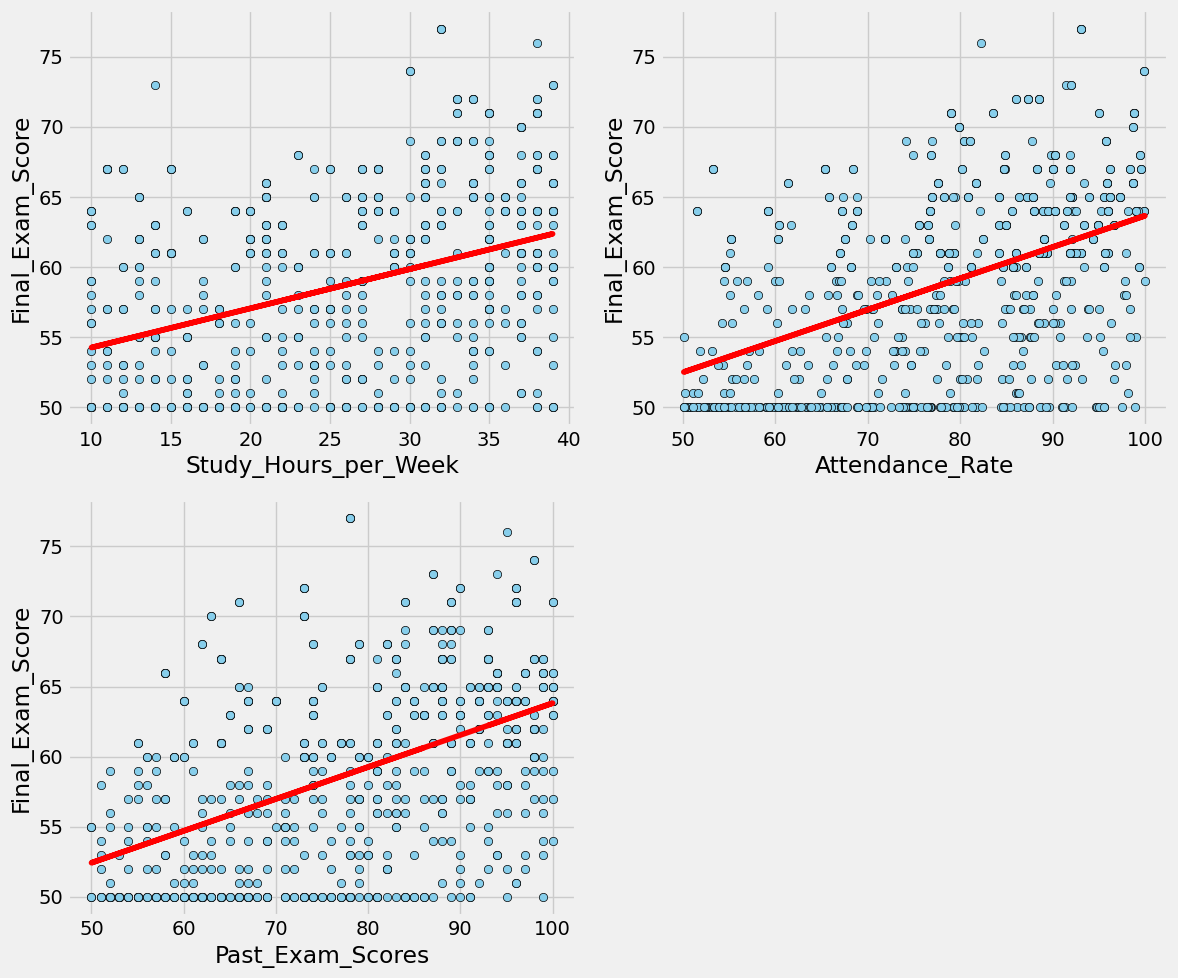

In [80]:
# Vẽ scatter plot với đường hồi quy cho 3 cột numerical (trừ Final_Exam_Score)
def scatter_plots_with_fit_line(numerical_cols, target_col):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Tạo lưới 2x2
    axes = axes.flatten() 
    
    # Lấy tối đa 3 cột để vẽ
    selected_cols = [col for col in numerical_cols if col != target_col][:3]
    
    for i, col in enumerate(selected_cols):
        x = original_spp.column(col)
        y = original_spp.column(target_col)
        
        # Vẽ scatter plot
        axes[i].scatter(x, y, color='skyblue', edgecolor='black')
        
        # Tính toán và vẽ đường hồi quy
        m, b = np.polyfit(x, y, 1)  # Hệ số hồi quy tuyến tính
        axes[i].plot(x, m * x + b, color='red')
        
        # Đặt nhãn và tiêu đề
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)
    
    # Ẩn subplot thừa
    for j in range(len(selected_cols), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()  
    plt.show()

# Gọi hàm với các cột numerical và cột mục tiêu
scatter_plots_with_fit_line(spp_numeric_cols, 'Final_Exam_Score')

In [83]:
for feature in numerical_features:
    print(f"Correlation between {feature} and Final_Exam_Score: {correlation(original_spp, feature, 'Final_Exam_Score'):.2f}")

Correlation between Study_Hours_per_Week and Final_Exam_Score: 0.37
Correlation between Attendance_Rate and Final_Exam_Score: 0.46
Correlation between Past_Exam_Scores and Final_Exam_Score: 0.49


Tương quan giữa 3 đặc trưng numerical

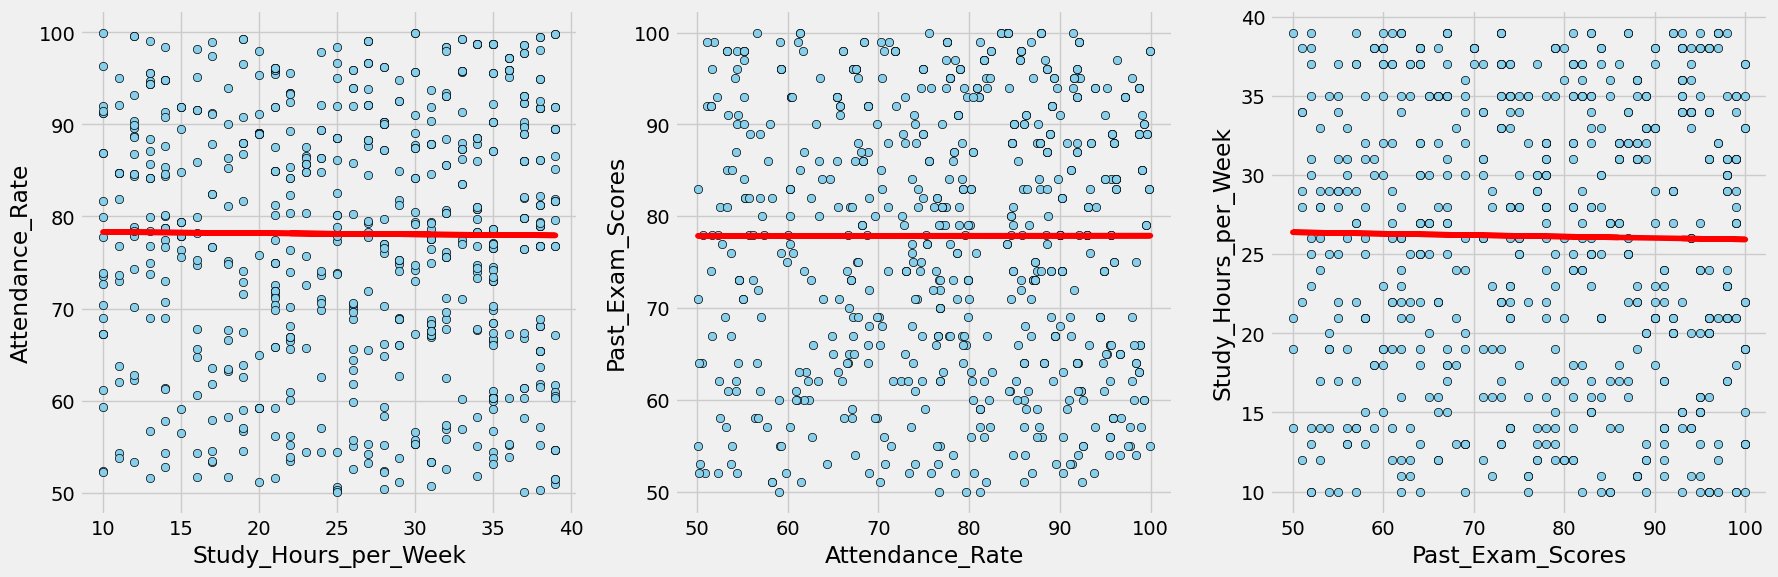

In [81]:
# Vẽ scatter plot với đường hồi quy cho 3 cặp cột trong cùng một hình
def scatter_plots_subplots():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Tạo lưới 1x3
    axes = axes.flatten()  

    # Biểu đồ 1: Study_Hours_per_Week vs Attendance_Rate
    x1 = original_spp.column('Study_Hours_per_Week')
    y1 = original_spp.column('Attendance_Rate')
    axes[0].scatter(x1, y1, color='skyblue', edgecolor='black')
    m1, b1 = np.polyfit(x1, y1, 1)  # Hệ số hồi quy tuyến tính
    axes[0].plot(x1, m1 * x1 + b1, color='red')
    axes[0].set_xlabel('Study_Hours_per_Week')
    axes[0].set_ylabel('Attendance_Rate')

    # Biểu đồ 2: Attendance_Rate vs Past_Exam_Scores
    x2 = original_spp.column('Attendance_Rate')
    y2 = original_spp.column('Past_Exam_Scores')
    axes[1].scatter(x2, y2, color='skyblue', edgecolor='black')
    m2, b2 = np.polyfit(x2, y2, 1)  # Hệ số hồi quy tuyến tính
    axes[1].plot(x2, m2 * x2 + b2, color='red')
    axes[1].set_xlabel('Attendance_Rate')
    axes[1].set_ylabel('Past_Exam_Scores')

    # Biểu đồ 3: Past_Exam_Scores vs Study_Hours_per_Week
    x3 = original_spp.column('Past_Exam_Scores')
    y3 = original_spp.column('Study_Hours_per_Week')
    axes[2].scatter(x3, y3, color='skyblue', edgecolor='black')
    m3, b3 = np.polyfit(x3, y3, 1)  # Hệ số hồi quy tuyến tính
    axes[2].plot(x3, m3 * x3 + b3, color='red')
    axes[2].set_xlabel('Past_Exam_Scores')
    axes[2].set_ylabel('Study_Hours_per_Week')

    plt.tight_layout() 
    plt.show()

# Gọi hàm để vẽ
scatter_plots_subplots()

In [85]:
print(f"Correlation between Study_Hours_per_Week and Attendance_Rate: {correlation(original_spp, 'Study_Hours_per_Week', 'Attendance_Rate'):.2f}")
print(f"Correlation between Attendance_Rate and Past_Exam_Scores: {correlation(original_spp, 'Attendance_Rate', 'Past_Exam_Scores'):.2f}")
print(f"Correlation between Past_Exam_Scores and Study_Hours_per_Week: {correlation(original_spp, 'Past_Exam_Scores', 'Study_Hours_per_Week'):.2f}")

Correlation between Study_Hours_per_Week and Attendance_Rate: -0.01
Correlation between Attendance_Rate and Past_Exam_Scores: 0.00
Correlation between Past_Exam_Scores and Study_Hours_per_Week: -0.01


## 3.2. Đặc trưng numerical vs Pass_Fail

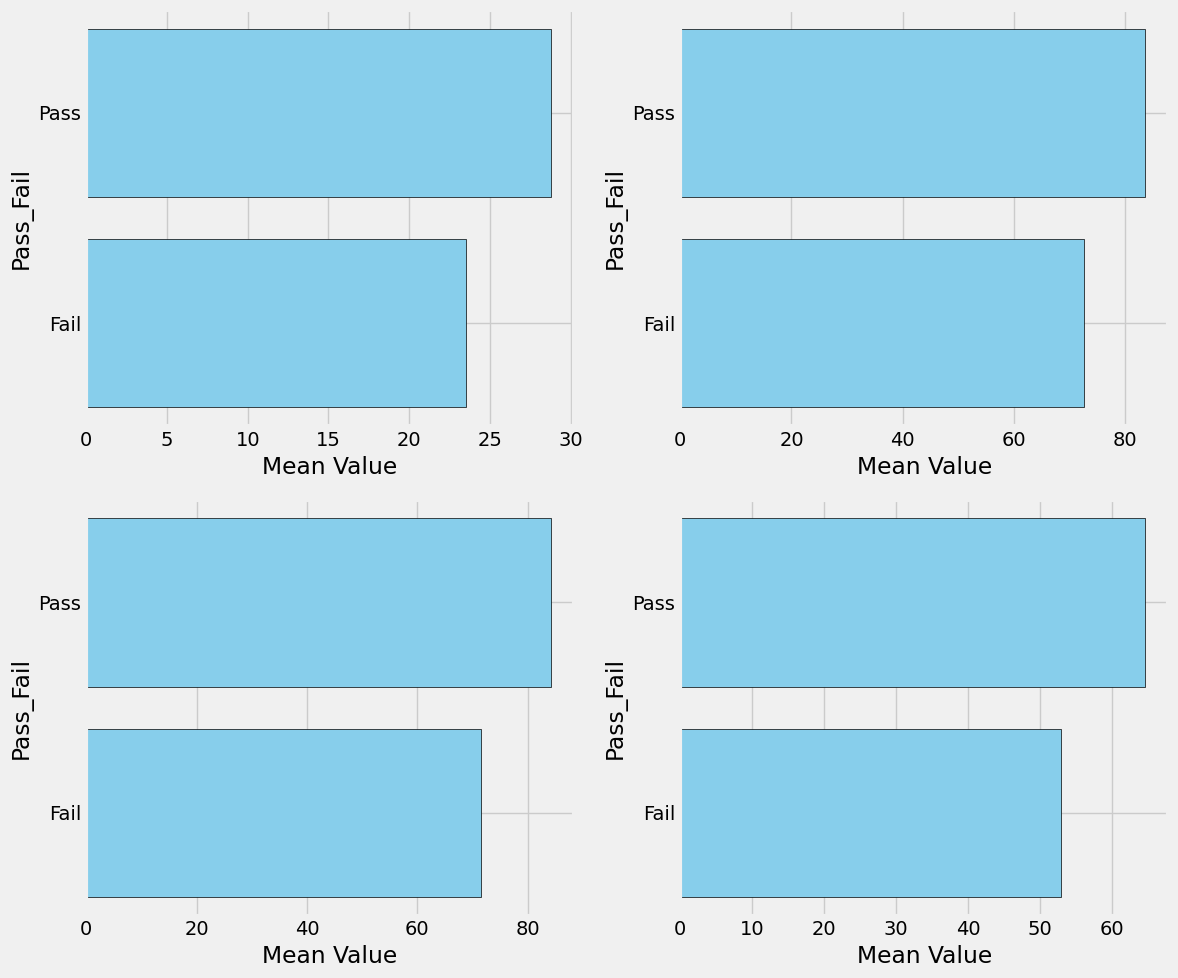

In [91]:
# Vẽ barh plot cho các cột numerical theo nhóm Pass/Fail trong lưới 2x2
def barh_plots_2x2(numerical_cols, group_col):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        grouped_data = original_spp.select(group_col, col).group(group_col, np.mean)
        axes[i].barh(grouped_data.column(group_col), grouped_data.column(f'{col} mean'), color='skyblue', edgecolor='black')
        axes[i].set_xlabel('Mean Value')
        axes[i].set_ylabel(group_col)

    plt.tight_layout() 
    plt.show()

barh_plots_2x2(spp_numeric_cols, 'Pass_Fail')

## 3.3. Đặc trưng categorical vs Final_Exam_Score

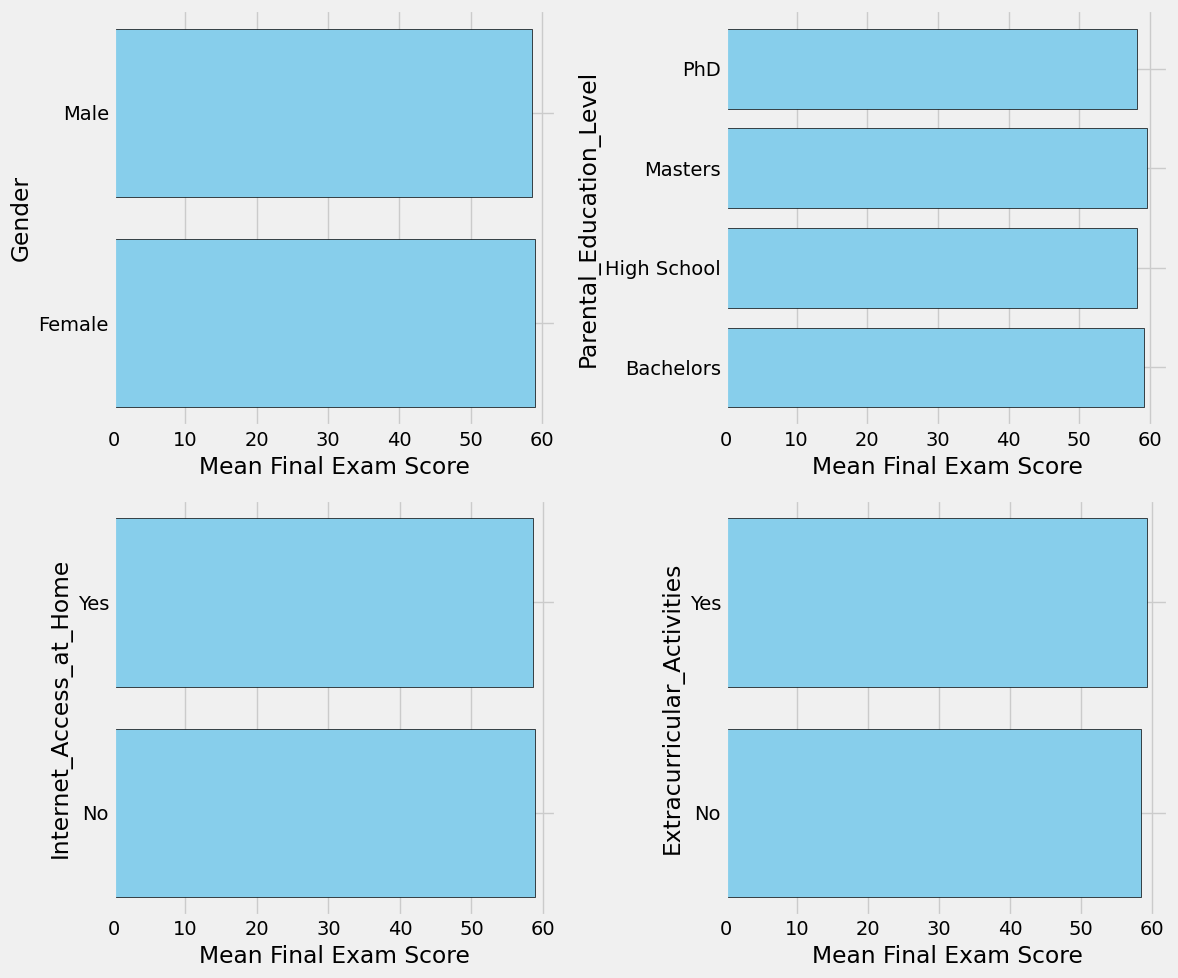

In [93]:
# Vẽ barh plot cho các cột categorical (trừ Pass_Fail) trong lưới 2x2
def barh_plots_categorical_2x2(categorical_cols, target_col):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
    axes = axes.flatten() 

    for i, col in enumerate(categorical_cols):
        grouped_data = original_spp.select(target_col, col).group(col, np.mean)
        axes[i].barh(grouped_data.column(col), grouped_data.column(f'{target_col} mean'), color='skyblue', edgecolor='black')
        axes[i].set_xlabel('Mean Final Exam Score')
        axes[i].set_ylabel(col)

    plt.tight_layout()  
    plt.show()

barh_plots_categorical_2x2(categorical_features, 'Final_Exam_Score')

## 3.4. Nhận xét

### Nhận xét tổng quan
- Mối quan hệ giữa 3 attributes: Study_Hours_per_Week, Attendance_rate, Past_Exam_Scores với Final_exam_score có vẻ tương quan khá
- Mối quan hệ giữa 3 attributes với nhau không
- Các dữ liệu numeric có vẻ có ý nghĩa hơn vì giữa 2 nhóm Pass và Fail thì giá trị trung bình có chêch lệch, cụ thể thì nhóm Pass có các giá trị trung bình của chỉ số về Study_Hours_per_week, Attendance_rate, Past_Exam_Scores cao hơn
- Dữ liệu categorical (Gender, Parental_Education_Level, Internet_Access_at_Home, Extracurricular_Activities) có vẻ không ảnh hưởng nhiều tới kết quả vì quan sát trung bình Final_Exam_Score thì giữa các nhóm xấp xỉ nhau

# 4. Kiểm định giả thuyết

Define functions for simulation

In [18]:
# Tạo bảng mới với các cột cần thiết
def difference_of_means(table, group_label, value_label):
    reduced = table.select(value_label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

# Tính toán độ chênh lệch trung bình giữa hai nhóm
def one_simulated_difference_of_means(table, group_label, value_label):
    # Shuffle the labels of the group column
    shuffled_labels = table.sample(with_replacement=False).column(group_label)
    
    shuffled_table = table.select(value_label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, group_label='Shuffled Label', value_label=value_label)   

# Simulate the null distribution of the difference of means
def simulate_null_distribution(table, group_label, value_label, repetitions=5000):
    differences = make_array()
    for i in np.arange(repetitions):
        new_difference = one_simulated_difference_of_means(table, group_label, value_label)
        differences = np.append(differences, new_difference)    
    return differences   

Overlaid distribution

In [19]:
def show_overlaid_distribution(table, group_label, value_label):
    reduced = table.select(group_label, value_label)
    reduced.hist(value_label, group=group_label)

## 4.1. Nhóm đặc trưng numerical

### 4.1.1. Liệu học sinh Pass có thời gian dành cho việc học trong tuần (Study_Hours_per_week) nhiều hơn học sinh Fail không?
- H0: Trung bình Study_Hours_per_week của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Study_Hours_per_week của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình tỷ lệ đi học của nhóm Pass và Fail: mean_pass - mean_fail.
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

Observed Difference:  5.265536723163841


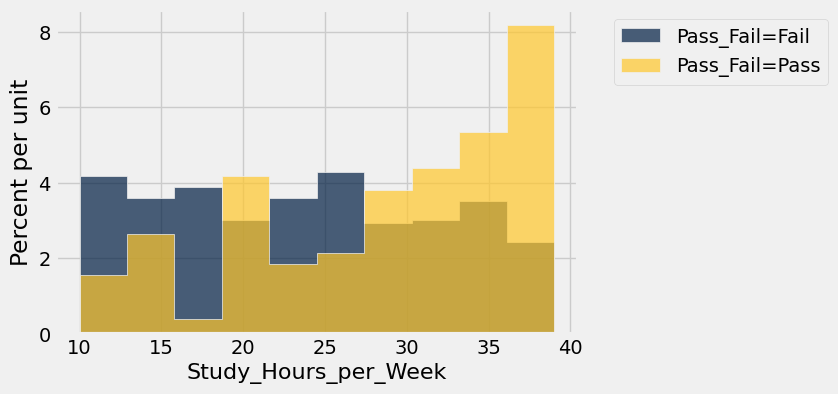

In [25]:
show_overlaid_distribution(original_spp, value_label='Study_Hours_per_Week', group_label='Pass_Fail')
observed_difference = difference_of_means(original_spp, 'Pass_Fail', 'Study_Hours_per_Week')
print('Observed Difference: ', observed_difference)

95% Confidence:  1.12994350282


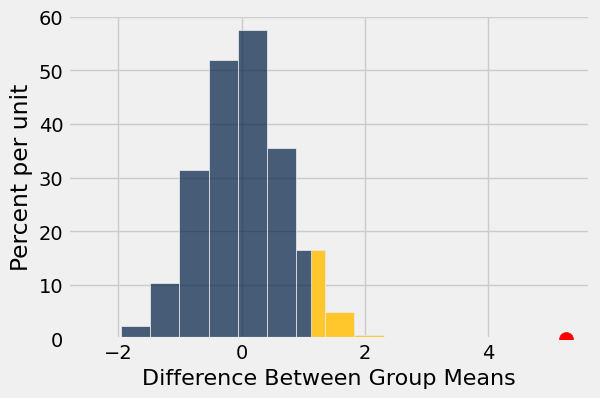

In [26]:
differences = simulate_null_distribution(original_spp, group_label='Pass_Fail', value_label='Study_Hours_per_Week')
resampled_means = Table().with_column('Difference Between Group Means', differences)
right = percentile(95, differences)
print('95% Confidence: ', right)
resampled_means.hist(left_end=right)
plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)

Với mức ý nghĩa 95%, bác bỏ H0
=> Học sinh Pass có thời gian dành cho việc học trong tuần (Study_Hours_per_week) nhiều hơn học sinh Fail

### 4.1.2. Liệu học sinh Pass có điểm trung bình các bài kiểm tra trước đấy (Past_Exam_Scores) cao hơn học sinh Fail không?
- H0: Trung bình Past_Exam_Scores của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Past_Exam_Scores của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình tỷ lệ đi học của nhóm Pass và Fail: abs(mean_pass - mean_fail).
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

Observed Difference:  12.567796610169495
95% Confidence:  1.71468926554


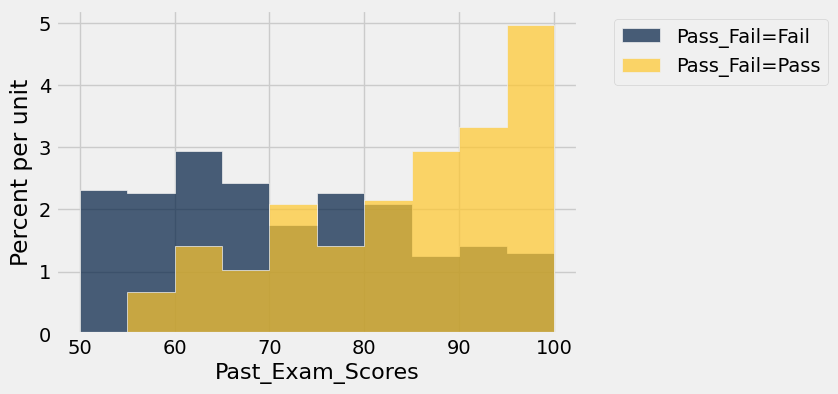

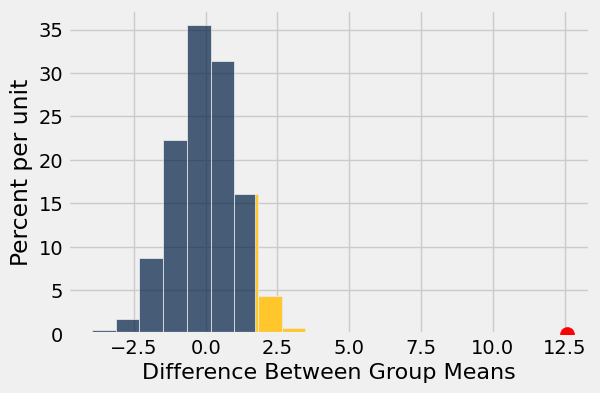

In [28]:
show_overlaid_distribution(original_spp, value_label='Past_Exam_Scores', group_label='Pass_Fail')
observed_difference = difference_of_means(original_spp, 'Pass_Fail', 'Past_Exam_Scores')
print('Observed Difference: ', observed_difference)
differences = simulate_null_distribution(original_spp, group_label='Pass_Fail', value_label='Past_Exam_Scores')
resampled_means = Table().with_column('Difference Between Group Means', differences)
right = percentile(95, differences)
print('95% Confidence: ', right)
resampled_means.hist(left_end=right)
plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)

Với ý nghĩa 95%, bác bỏ H0
=> Học sinh Pass có điểm trung bình các bài kiểm tra trước đấy (Past_Exam_Scores) cao hơn học sinh Fail

### 4.1.3. Liệu học sinh Pass có tỷ lệ đi học (Attendance_rate) cao hơn học sinh Fail không?
- H0: Trung bình Attendance_rate của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Attendance_Rate của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình tỷ lệ đi học của nhóm Pass và Fail: mean_pass - mean_fail.
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

Observed Difference:  10.931900225962963
95% Confidence:  1.73438510301


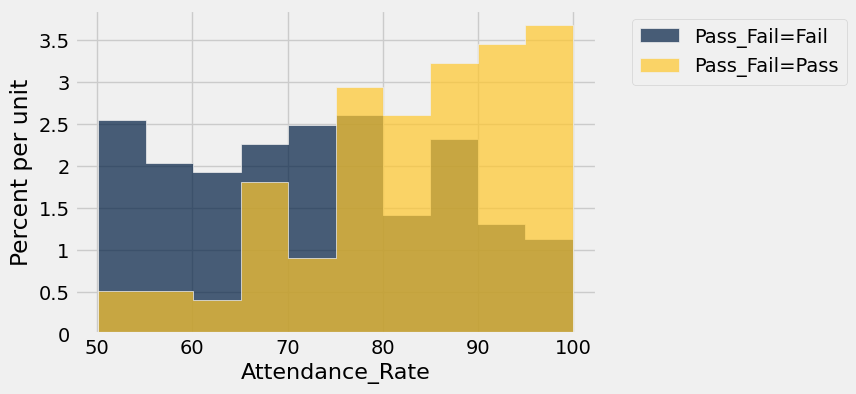

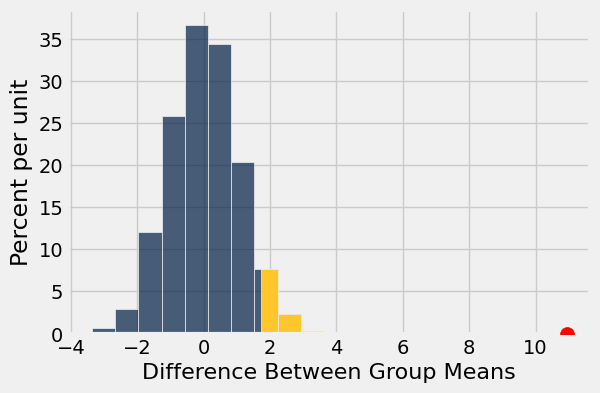

In [27]:
show_overlaid_distribution(original_spp, value_label='Attendance_Rate', group_label='Pass_Fail')
observed_difference = difference_of_means(original_spp, 'Pass_Fail', 'Attendance_Rate')
print('Observed Difference: ', observed_difference)
differences = simulate_null_distribution(original_spp, group_label='Pass_Fail', value_label='Attendance_Rate')
resampled_means = Table().with_column('Difference Between Group Means', differences)
right = percentile(95, differences)
print('95% Confidence: ', right)
resampled_means.hist(left_end=right)
plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)

Với ý nghĩa 95%, bác bỏ H0
=> Học sinh Pass có tỷ lệ đi học (Attendance_rate) cao hơn học sinh Fail

## 4.2. Nhóm đặc trưng Categorical

### 4.2.1. Liệu giới tính (Gender) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của Male bằng Female.
- H1: Trung bình Final_Exam_Score của Male khác Female (two-sided test).
- Test statistic: Sự khác biệt giữa trung bình điểm của Male và Female: abs(mean_male - mean_female).
- Phương pháp: Permutation test, xáo trộn nhãn Gender để mô phỏng H0.

Observed Difference:  -0.4411291291291306


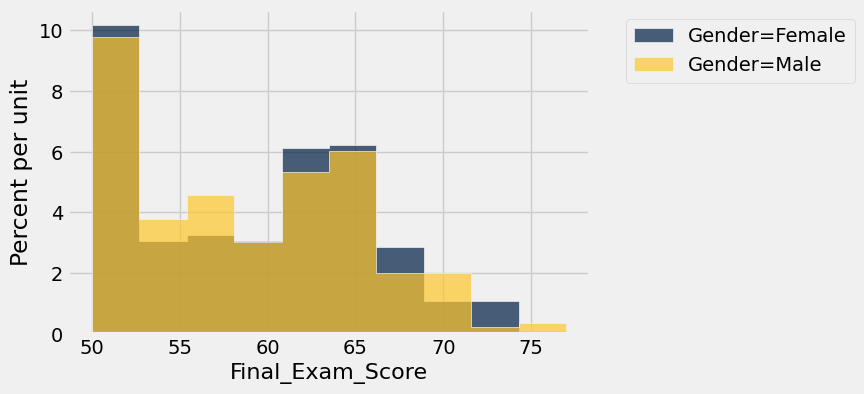

In [20]:
show_overlaid_distribution(original_spp, 'Gender', 'Final_Exam_Score')
observed_difference = difference_of_means(original_spp, 'Gender', 'Final_Exam_Score')
print('Observed Difference: ', observed_difference)


95% Confidence Interval: [-0.97974775  0.99896697]


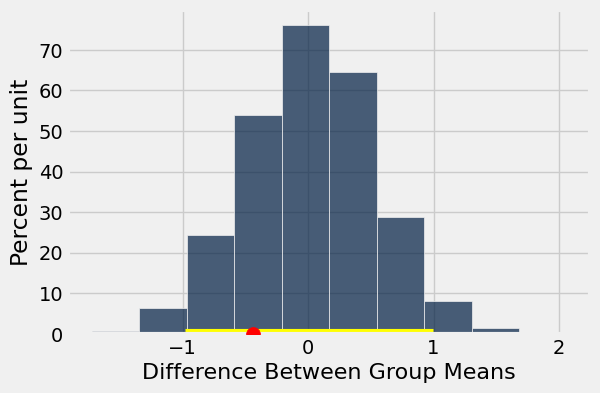

In [21]:
differences = simulate_null_distribution(original_spp, group_label='Gender', value_label='Final_Exam_Score')

# Simulate the null distribution of the difference of means
resampled_means = Table().with_column('Difference Between Group Means', differences)

# Plot the histogram of the null distribution
left = percentile(2.5, differences)
right = percentile(97.5, differences)

bounds = make_array(left, right)
print('95% Confidence Interval:', bounds)

resampled_means.hist()
plt.plot(bounds, [0, 0], color='yellow', lw=8)
plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)


Với mức ý nghĩa 95%, không bác bỏ H0
=> Giới tính không ảnh hưởng

### 4.2.2. Liệu học vấn của phụ huynh (Parental_Education_Level) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của nhóm có internet (Yes) bằng nhóm không có internet (No).
- H1: Trung bình Final_Exam_Score của nhóm có internet cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình điểm của nhóm Yes và No: abs(mean_yes - mean_no).
- Phương pháp: Permutation test, xáo trộn nhãn Internet_Access_at_Home.

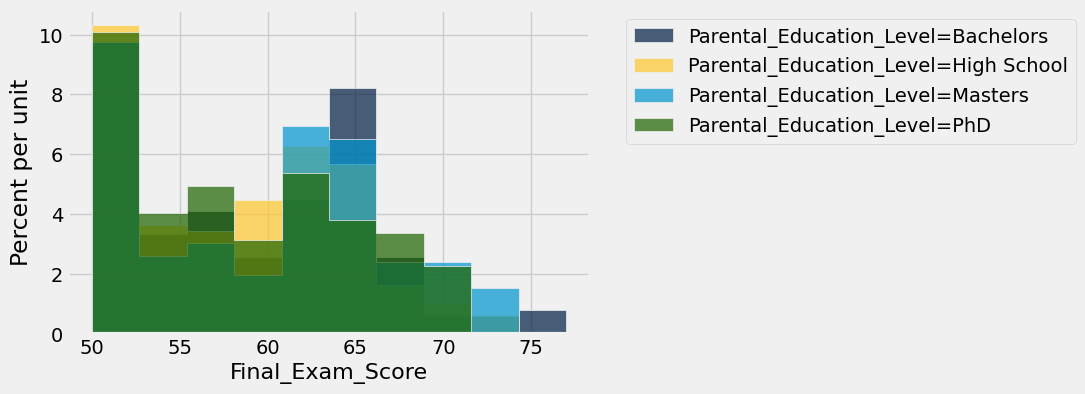

In [22]:
show_overlaid_distribution(original_spp, 'Parental_Education_Level', 'Final_Exam_Score')

### 4.2.3. Liệu khả năng truy cập được mạng ở nhà (Internet_Access_at_Home) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Study_Hours_per_Week của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Study_Hours_per_Week của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình giờ học của nhóm Pass và Fail: abs(mean_pass - mean_fail).
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

Observed Difference:  -0.17717739411013866
95% Confidence Interval: [-0.98981435  0.98210889]


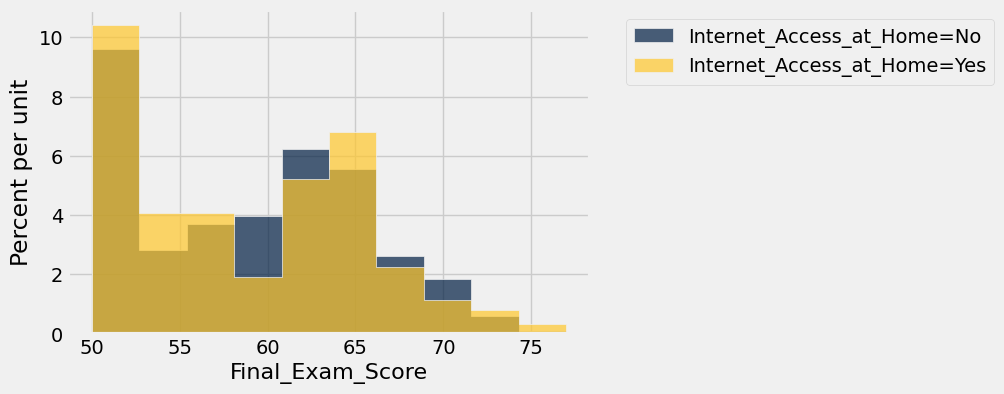

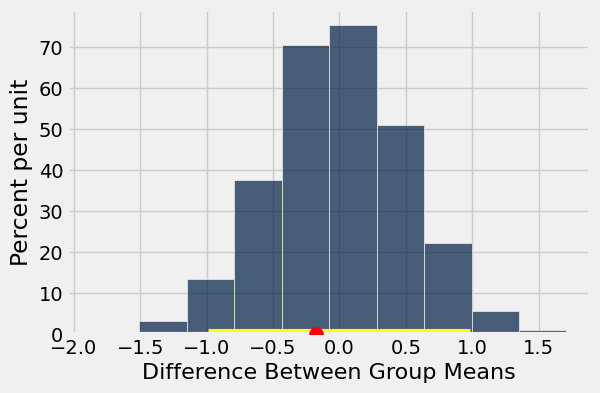

In [23]:
show_overlaid_distribution(original_spp, 'Internet_Access_at_Home', 'Final_Exam_Score')
observed_difference = difference_of_means(original_spp, 'Internet_Access_at_Home', 'Final_Exam_Score')
print('Observed Difference: ', observed_difference)
differences = simulate_null_distribution(original_spp, group_label='Internet_Access_at_Home', value_label='Final_Exam_Score')
resampled_means = Table().with_column('Difference Between Group Means', differences)
left = percentile(2.5, differences)
right = percentile(97.5, differences)
bounds = make_array(left, right)
print('95% Confidence Interval:', bounds)
resampled_means.hist()
plt.plot(bounds, [0, 0], color='yellow', lw=8)
plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)

Với mức ý nghĩa 95%, không bác bỏ H0
=> Khả năng truy cập được mạng ở nhà không ảnh hưởng đến điểm thi cuối kỳ

### 4.2.4. Liệu việc tham gia hoạt động ngoại khóa (Extracurricular_Activities) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của nhóm tham gia (Yes) bằng nhóm không tham gia (No).
- H1: Trung bình Final_Exam_Score của nhóm tham gia khác nhóm không tham gia (two-sided test).
- Test statistic: Sự khác biệt giữa trung bình điểm của nhóm Yes và No: abs(mean_yes - mean_no).
- Phương pháp: Permutation test, xáo trộn nhãn Extracurricular_Activities.

Observed Difference:  0.9065595887185012
95% Confidence Interval: [-0.99813997  0.99699043]


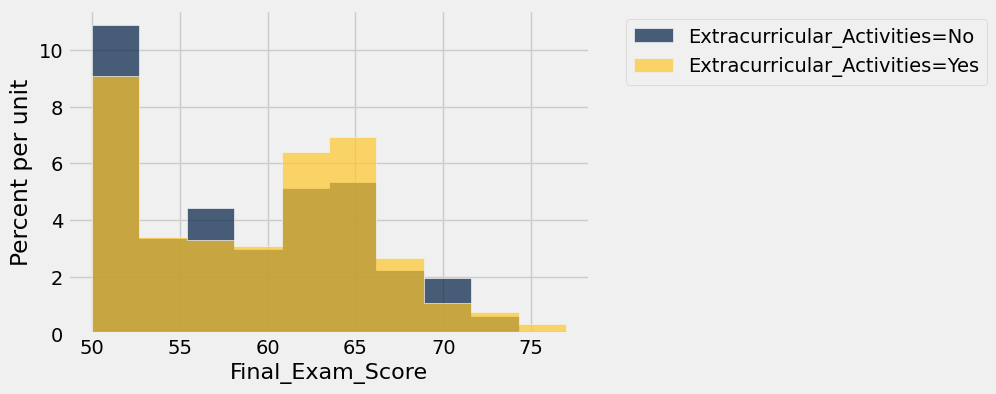

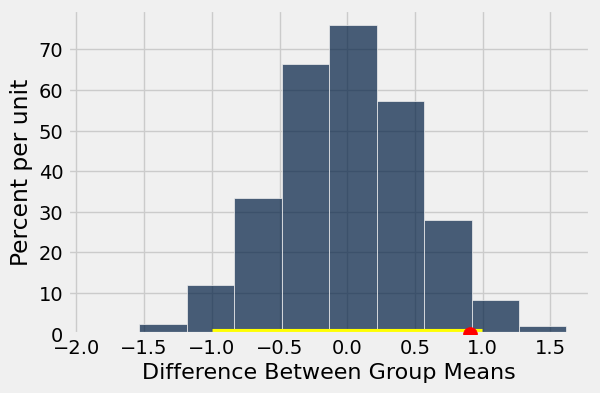

In [24]:
show_overlaid_distribution(original_spp, 'Extracurricular_Activities', 'Final_Exam_Score')
observed_difference = difference_of_means(original_spp, 'Extracurricular_Activities', 'Final_Exam_Score')
print('Observed Difference: ', observed_difference)
differences = simulate_null_distribution(original_spp, group_label='Extracurricular_Activities', value_label='Final_Exam_Score')
resampled_means = Table().with_column('Difference Between Group Means', differences)
left = percentile(2.5, differences)
right = percentile(97.5, differences)
bounds = make_array(left, right)
print('95% Confidence Interval:', bounds)
resampled_means.hist()
plt.plot(bounds, [0, 0], color='yellow', lw=8)
plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)

Với mức ý nghĩa 95%, không bác bỏ H0
=> Việc tham gia hoạt động ngoại khóa (Extracurricular_Activities) không ảnh hưởng đến điểm thi cuối kỳ

# 5. Hồi quy tuyến tính

## 5.1. Dự đoán Final_Exam_Score

## 5.2. Phân tích hệ số hồi quy

## 5.3. Kiểm tra giả định hồi quy

## 5.4. Nhận xét

Define công thức tính correlaion

#### Numeric

In [30]:
# Lấy bảng con chỉ chứa các cột numerical này
numerical_data = original_spp.select(spp_numeric_cols)
numerical_data.show(5)

Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
31,68.2678,86,63
16,78.2229,73,50
21,87.5251,74,55
27,92.0765,99,65
37,98.6555,63,70


In [31]:
print(f'Correlation between Study_Hours_per_Week and Final_Exam_Score: {correlation(numerical_data, 'Study_Hours_per_Week', 'Final_Exam_Score')}')
print(f'Correlation between Attendance_Rate and Final_Exam_Score: {correlation(numerical_data, 'Attendance_Rate', 'Final_Exam_Score')}')
print(f'Correlation between Past_Exam_Scores and Final_Exam_Score: {correlation(numerical_data, 'Past_Exam_Scores', 'Final_Exam_Score')}')


Correlation between Study_Hours_per_Week and Final_Exam_Score: 0.37038693066644807
Correlation between Attendance_Rate and Final_Exam_Score: 0.4604775536334199
Correlation between Past_Exam_Scores and Final_Exam_Score: 0.48951569382078053


#### Categorical

In [32]:
original_spp.select('Gender', 'Final_Exam_Score').group('Gender', np.mean)

Gender,Final_Exam_Score mean
Female,58.9787
Male,58.5375


In [33]:
original_spp.select('Parental_Education_Level', 'Final_Exam_Score').group('Parental_Education_Level', np.mean)


Parental_Education_Level,Final_Exam_Score mean
Bachelors,59.127
High School,58.1257
Masters,59.5906
PhD,58.2303


In [34]:
original_spp.select('Internet_Access_at_Home', 'Final_Exam_Score').group('Internet_Access_at_Home', np.mean)


Internet_Access_at_Home,Final_Exam_Score mean
No,58.853
Yes,58.6758


In [35]:
original_spp.select('Extracurricular_Activities', 'Final_Exam_Score').group('Extracurricular_Activities', np.mean)

Extracurricular_Activities,Final_Exam_Score mean
No,58.3269
Yes,59.2334


# 6. Phân loại

## 6.1. Dự đoán Pass_Fail

## 6.2. Phân tích đặc trưng quan trọng

## 6.3. Nhận xét

# 7.Kết luận 


Tóm tắt kết quả